In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
urineDS=pd.read_csv("/content/drive/MyDrive/Grad2/lastUrine.csv")
urineDS=urineDS.iloc[:,1:]

urineOutput=urineDS.iloc[2:,0:1]
urineInput=urineDS.iloc[2:,201:525]

data = urineInput
scaler = StandardScaler()
scaler.fit(data)
urineInput=scaler.transform(data)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(urineInput, urineOutput, test_size=0.33, random_state=0)

In [ ]:
X_train=X_train.astype(np.float64)
X_test=X_test.astype(np.float64)
y_train=y_train.astype(np.float64)-1
y_test=y_test.astype(np.float64)-1

print(y_train)

     Metadata
231       1.0
20        1.0
169       0.0
254       1.0
126       0.0
..        ...
253       0.0
194       0.0
119       1.0
49        1.0
174       1.0

[201 rows x 1 columns]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten,concatenate

from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
import keras
from matplotlib import pyplot as plt

model3 = Sequential()
model3.add(Conv1D(256, 3, activation='relu', input_shape=(324, 1)))
model3.add(Conv1D(256, 3, activation='relu'))
model3.add(Dropout(0.25))
model3.add(MaxPooling1D(2))
model3.add(Conv1D(128, 3, activation='relu'))
model3.add(MaxPooling1D(2))
model3.add(Dropout(0.25))
model3.add(Conv1D(64, 3, activation='relu'))
model3.add(MaxPooling1D(2))
model3.add(Dropout(0.5))
model3.add(Flatten())
model3.add(Dense(16, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/17
6/6 [==============================] - 9s 824ms/step - loss: 0.7002 - accuracy: 0.5722 - val_loss: 0.6879 - val_accuracy: 0.5714
Epoch 2/17
6/6 [==============================] - 2s 339ms/step - loss: 0.6864 - accuracy: 0.5333 - val_loss: 0.6640 - val_accuracy: 0.6190
Epoch 3/17
6/6 [==============================] - 2s 334ms/step - loss: 0.6873 - accuracy: 0.6222 - val_loss: 0.6422 - val_accuracy: 0.6190
Epoch 4/17
6/6 [==============================] - 2s 336ms/step - loss: 0.6599 - accuracy: 0.6556 - val_loss: 0.6184 - val_accuracy: 0.8571
Epoch 5/17
6/6 [==============================] - 2s 337ms/step - loss: 0.6418 - accuracy: 0.6444 - val_loss: 0.6009 - val_accuracy: 0.6667
Epoch 6/17
6/6 [==============================] - 2s 336ms/step - loss: 0.5807 - accuracy: 0.7278 - val_loss: 0.5706 - val_accuracy: 0.9524
Epoch 7/17
6/6 [==============================] - 2s 333ms/step - loss: 0.5502 - accuracy: 0.7722 - val_loss: 0.5098 - val_accuracy: 0.8095
Epoch 8/17
6/6 [====

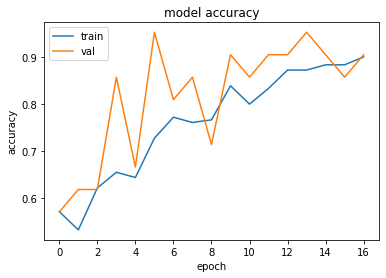

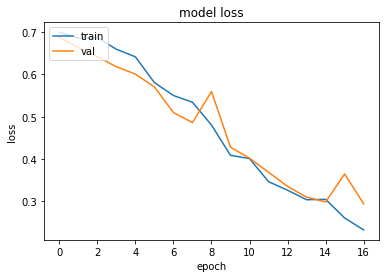

In [ ]:
history =model3.fit(X_train,y_train, batch_size=32, epochs=17, validation_split=0.1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)
model3.save('/content/drive/MyDrive/Grad2Models/genderGC')

2.8.2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Grad2Models/genderGC/assets


In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Grad2Models/genderGC', compile=False)

# Check its architecture
new_model.summary()

2.8.2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 322, 256)          1024      
                                                                 
 conv1d_1 (Conv1D)           (None, 320, 256)          196864    
                                                                 
 dropout (Dropout)           (None, 320, 256)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 160, 256)         0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 158, 128)          98432     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 79, 128)          0         
 1D)                                              

In [ ]:
prediction=new_model.predict(X_test)

for i in range (prediction.shape[0]):
  if prediction[i]< 0.5:
    prediction[i]=0
  else:
    prediction[i]=1  

yout=y_test.to_numpy()    
counter=0


for i in range (prediction.shape[0]):
  print("pred",prediction[i],"---- Real",yout[i])
  if prediction[i] == yout[i] :
    counter=counter+1


print("Accuracy is ",counter,"%")  

pred [0.] ---- Real [0.]
pred [1.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [0.]
pred [0.] ---- Real [1.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [0.]
pred [0.] ---- Real [1.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [1.]
pred [0.] ---- Real [1.]
pred [1.] ---- Real [0.]
pred [0.] ---- Real [0.]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
cm = confusion_matrix(yout, prediction)

Text(0.5, 12.5, 'Predicted label')

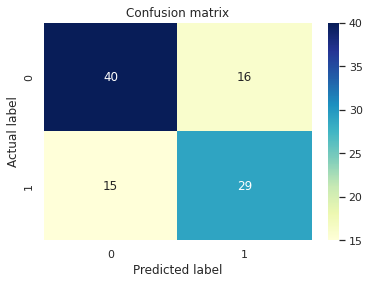

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yout,prediction))

              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72        56
         1.0       0.64      0.66      0.65        44

    accuracy                           0.69       100
   macro avg       0.69      0.69      0.69       100
weighted avg       0.69      0.69      0.69       100



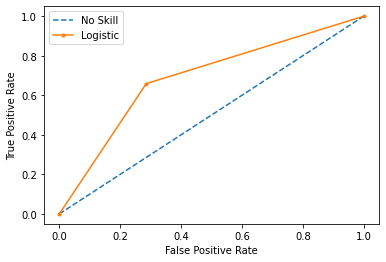

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(yout))]

ns_auc = roc_auc_score(yout, ns_probs)
lr_auc = roc_auc_score(yout, prediction)

ns_fpr, ns_tpr, _ = roc_curve(yout, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(yout, prediction)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()